In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

pgs_user = 'dsbc_student'
pgs_pw = '7*.8G9QH21'
pgs_host = '142.93.121.174'
pgs_port = '5432'
pgs_db = 'studentsperformance'

engine=create_engine('postgresql://{}:{}@{}:{}/{}'.format(pgs_user,pgs_pw,pgs_host,pgs_port, pgs_db))

student_df = pd.read_sql_query('select * from studentsperformance', con=engine)
engine.dispose()

student_df.info()
student_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

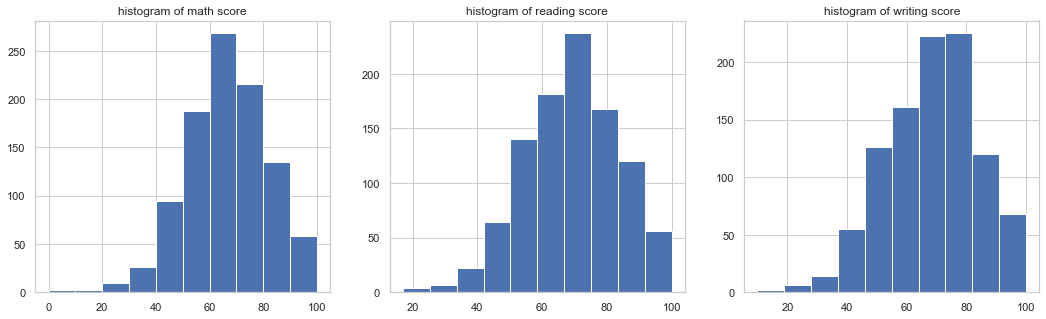

In [2]:
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(student_df["math score"])
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(student_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(student_df["writing score"])
plt.title("histogram of writing score")

plt.show()

In [3]:
jb_stats = jarque_bera(student_df["math score"])
norm_stats = normaltest(student_df["math score"])
print("Jarque-Bera test statistics for math score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for math score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["reading score"])
norm_stats = normaltest(student_df["reading score"])
print("Jarque-Bera test statistics for reading score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for reading score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["writing score"])
norm_stats = normaltest(student_df["writing score"])
print("Jarque-Bera test statistics for writing score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for writing score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics for math score is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics for math score is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics for reading score is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics for reading score is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics for writing score is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics for writing score is 13.606450837263859 and p value is 0.0011101885439899974


## The p-values are close to 0, which indicates taht they are not normally distributed.

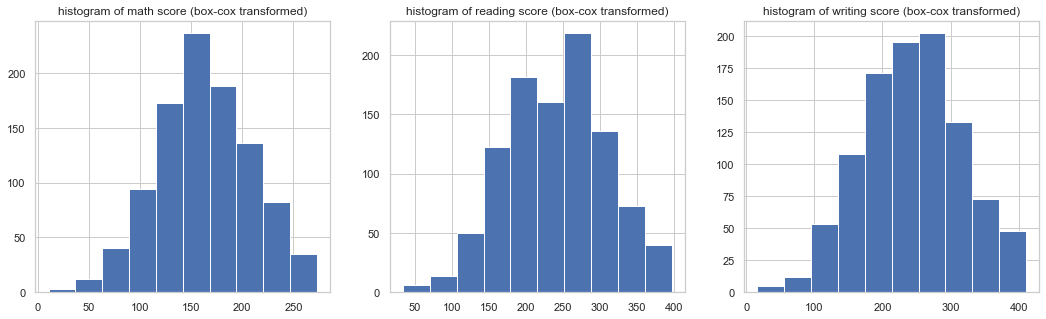

In [4]:
math_boxcox,_ = boxcox(student_df[student_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(student_df[student_df["reading score"] > 0]["reading score"])
writing_boxcox,_ = boxcox(student_df[student_df["writing score"] > 0]["writing score"])

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()

In [5]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)
print("Jarque-Bera test statistics for math score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for math score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)
print("Jarque-Bera test statistics for reading score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for reading score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)
print("Jarque-Bera test statistics for writing score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for writing score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics for math score is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics for math score is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics for reading score is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics for reading score is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics for writing score is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics for writing score is 6.267311355052559 and p value is 0.04355827085003712


## Most of the p values are greater than 0.05. Hence, the Box-Cox transformation enabled the data to be normalized.

# 2. Say you want to use a single variable for the exam scores as your target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

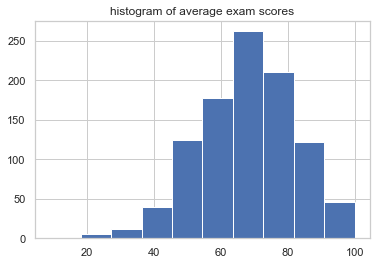

Jarque-Bera test statistics for average exam scores is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics for average exam scores is 15.186721327231322 and p value is 0.0005037851534494478


In [6]:
student_df["w_avg_exam"] = (student_df["math score"] + student_df["reading score"] + student_df["writing score"]) / 3

plt.hist(student_df["w_avg_exam"])
plt.title("histogram of average exam scores")

plt.show()

jb_stats = jarque_bera(student_df["w_avg_exam"])
norm_stats = normaltest(student_df["w_avg_exam"])
print("Jarque-Bera test statistics for average exam scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for average exam scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


## Not normally distributed.

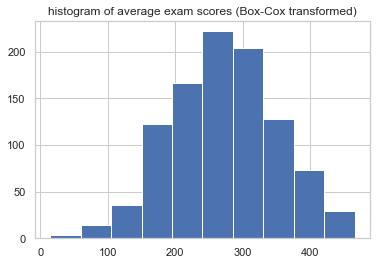

Jarque-Bera test statistics for average exam scores is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics for average exam scores is 2.779857602227616 and p value is 0.24909303914726724


In [7]:
avg_boxcox,_ = boxcox(student_df[student_df["w_avg_exam"] > 0]["w_avg_exam"])

plt.hist(avg_boxcox)
plt.title("histogram of average exam scores (Box-Cox transformed)")

plt.show()

jb_stats = jarque_bera(avg_boxcox)
norm_stats = normaltest(avg_boxcox)
print("Jarque-Bera test statistics for average exam scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for average exam scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


## With Box-Cox transformation, the data is normally distributed.

# 3. Which variables seem related to the target variable (the newly created variable from the previous question)? If your goal is to explain the determinants of success in exams, which variables in your dataset might be useful?

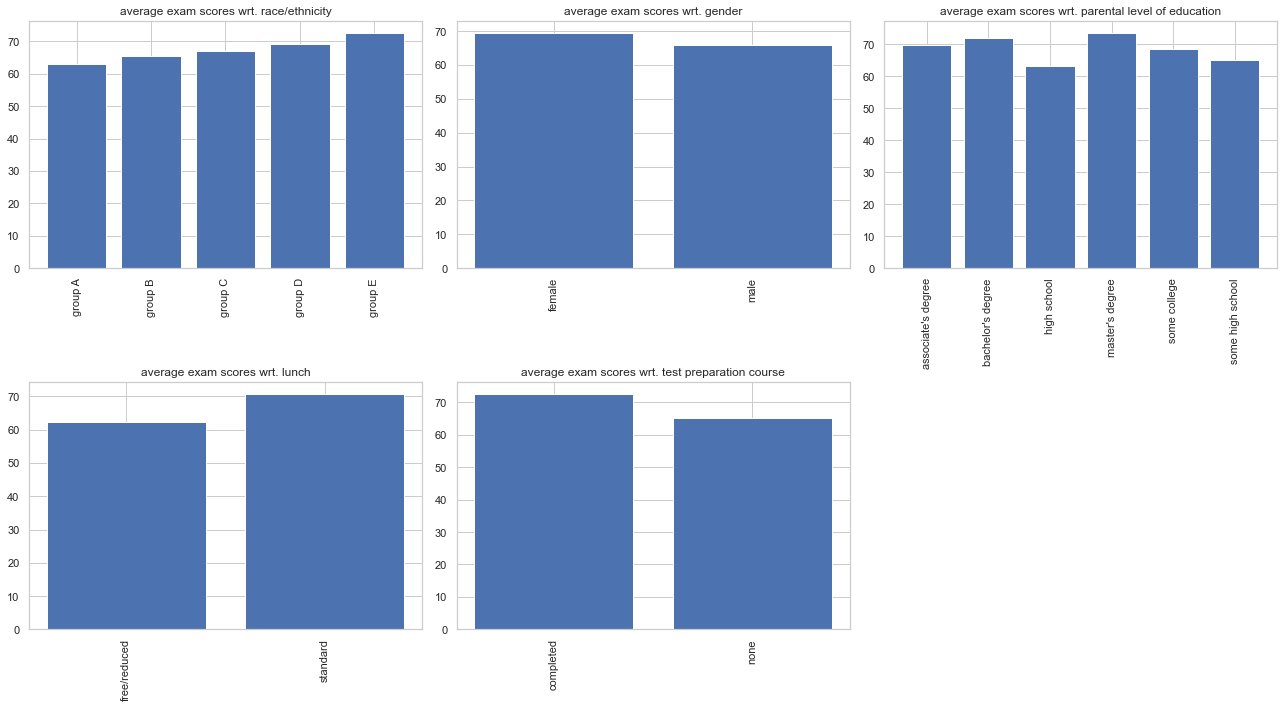

In [8]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(student_df.groupby("race/ethnicity")
        ["w_avg_exam"].mean().index, student_df.groupby("race/ethnicity")["w_avg_exam"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(student_df.groupby("gender")
        ["w_avg_exam"].mean().index, student_df.groupby("gender")["w_avg_exam"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(student_df.groupby("parental level of education")
        ["w_avg_exam"].mean().index, student_df.groupby("parental level of education")["w_avg_exam"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(student_df.groupby("lunch")
        ["w_avg_exam"].mean().index, student_df.groupby("lunch")["w_avg_exam"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(student_df.groupby("test preparation course")
        ["w_avg_exam"].mean().index, student_df.groupby("test preparation course")["w_avg_exam"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

1. Average exam score increases from group A to group E. Hence race/ethnicity may play an important role in explaining the successes in the exams.
1. Female students seem to be more successful than the males.
1. There is also some variation between the parental levels of education with respect to the exam scores.
1. Lunch type also exhibits variance in the average exam scores. But, this is probably not because of the lunch type itself but because of something that affects both the lunch type and the exam scores.
1. Those who completed the test preparation course seem to be more successful than the others.

## Considering all these, all variables might be used in explaining the success in the exams but the lunch variable should be used precautiously.